In [787]:
## Skip-gram model

In [788]:
import numpy as np
import tensorflow as tf

In [789]:
#corpus_raw = 'He is the king . The king is royal . she is the royal queen .'

In [790]:
# Convert to lower case 
corpus_raw = corpus_raw.lower()
print corpus_raw 

he is the king . the king is royal . she is the royal . queen he is the king . the king is royal . she is the royal queen


In [791]:
# Here’s a handy example from this amazing post on word2vec by Chris McCormick.
#from IPython.display import Image
#Image(filename='/home/asabir/Desktop/exp-w2v.png')

In [792]:
words = []
#becuase we dont want to treat . as word 
for word in corpus_raw.split():
    if word != '.':
        words.append(word)

In [793]:
# remove all duplicate word 
words = set (words)
print words

set(['king', 'is', 'queen', 'royal', 'she', 'the', 'he'])


In [794]:
word2int = {}
int2word = {}
# Give the total number of unique words 
vocab_size = len(words)
print('give the total number of unique words')
print vocab_size 
### 
for i, word in enumerate(words):
    word2int[word] = i 
    int2word[i] = word

give the total number of unique words
7


In [795]:
# The dictionaries allow us to do : 
print (word2int['queen'])

2


In [796]:
print (int2word[3])

royal


In [797]:
# we want a list if our sentences as a list of words:
# raw_sentencce is a list of sentences
raw_sentences = corpus_raw.split('.')
sentences = [] 
for sentence in raw_sentences:
    sentences.append(sentence.split())
# to give us a list of sentences where each senteance is a list of words. 
print (sentences)    

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal'], ['queen', 'he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [798]:
# Now we genterate our traning data 
data = [] 

WINDOW_SIZE = 2 

for sentence in sentences: 
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[(max(word_index - WINDOW_SIZE, 0)): min(word_index + WINDOW_SIZE, len(sentence)+1)] :
                             if nb_word != word: 
                                   data.append([word, nb_word])

In [799]:
print (data)

[['he', 'is'], ['is', 'he'], ['is', 'the'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['king', 'the'], ['king', 'is'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['is', 'she'], ['is', 'the'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['royal', 'is'], ['royal', 'the'], ['queen', 'he'], ['he', 'queen'], ['he', 'is'], ['is', 'queen'], ['is', 'he'], ['is', 'the'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['king', 'the'], ['king', 'is'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['is', 'she'], ['is', 'the'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [800]:
# now we need to represented the data in ONE-hot-encoder 
# for example 
# for example you have 3 words : tokyo, texas , barcelona
#word2int = ['tokyo'] --> 0 --> [1 0 0]
#word2int = ['barcelona'] --> 1 --> [0 1 0]
#word2int = ['texas '] --> 2 --> [0 0 1]


In [801]:
# Hot encoder vector 
# function to convert number to one hot vertors 
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index]= 1 
    return temp 

In [802]:
# input word 
x_train = [] 
# output word
y_train = []
# 
for data_word in data: 
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))
    

In [803]:
# convert them to numpy arrays 
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [804]:
print(x_train)

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0

In [805]:
print(y_train)

[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0

In [806]:
print(x_train.shape, y_train.shape)
### meaning 27 tranining point where each point has 7 dimensions 

((54, 7), (54, 7))


In [807]:
#### Tensorflow program start Here 
### creating the placeholder  x_train, and y_train 
x = tf.placeholder(tf.float32, shape =(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape =(None, vocab_size))

In [808]:
#from IPython.display import Image
#Image(filename='/home/asabir/Desktop/Embaddig.jpeg')

In [809]:
print y_label

Tensor("Placeholder_29:0", shape=(?, 7), dtype=float32)


In [810]:
print x

Tensor("Placeholder_28:0", shape=(?, 7), dtype=float32)


In [811]:
#from IPython.display import Image
#Image(filename='/home/asabir/Desktop/Embaddig2.jpeg')

In [812]:
# Now we convert it into embadding representation (as figure　↓し)
## you can choose the your own number 
EMBEDDING_DIM = 5 
### W
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
### B 
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
## Hidden 
hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [813]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

In [814]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [815]:
#from IPython.display import Image
#Image(filename='/home/asabir/Desktop/Embaddig3.jpeg')

In [816]:
## Input_one_hot ---> embedded repr. ----> predicted_neighbour_prob 

In [817]:
# Now, let start the tranining  
sess = tf.Session() 
init = tf.global_variables_initializer()
sess.run(init) 

In [818]:
#define the loss function 
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [819]:
#define the tranining stetp 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [820]:
n_iters = 20

In [821]:
### train for n_iter iterations 
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 3.7491734)
('loss is : ', 3.5242376)
('loss is : ', 3.3510962)
('loss is : ', 3.2079258)
('loss is : ', 3.0847187)
('loss is : ', 2.9762363)
('loss is : ', 2.8792386)
('loss is : ', 2.7914884)
('loss is : ', 2.7113633)
('loss is : ', 2.6376729)
('loss is : ', 2.5695522)
('loss is : ', 2.5063887)
('loss is : ', 2.4477642)
('loss is : ', 2.3934081)
('loss is : ', 2.3431528)
('loss is : ', 2.2968962)
('loss is : ', 2.2545612)
('loss is : ', 2.2160583)
('loss is : ', 2.1812558)
('loss is : ', 2.1499569)


In [822]:
Vectors = sess.run(W1+b1)

In [823]:
print (sess.run(W1))
print('----------')

[[ 0.63531131 -0.29805526  0.16432349  0.71807015 -0.25180089]
 [ 2.25697994 -0.58208686  1.39743459 -0.18036509 -0.03716298]
 [ 0.85124224  1.08339036 -0.99309367  0.55763459  1.092062  ]
 [-2.56640577  0.55660689 -1.1398946  -2.48028779 -0.7292859 ]
 [ 1.94922936  1.48876047 -2.22827291 -0.27098572  0.98659408]
 [-0.94583172 -1.78401351 -0.67550153 -1.35020363 -0.00434981]
 [-0.58859318 -1.23841906 -1.00922036  0.2624585   0.20980985]]
----------


In [824]:
print(sess.run(b1))
print('----------')

[ 1.67084026 -0.41547573  1.34568477  0.66651189 -0.88418996]
----------


In [825]:
print(b1)

<tf.Variable 'Variable_61:0' shape=(5,) dtype=float32_ref>


In [826]:
### one-hot-vectors 
##from IPython.display import Image
##Image(filename='/home/asabir/Desktop/hot_v.png')

In [827]:
#Multiply the one hot vector with W1, we basically get access to the raw of W1 which is in the fact ..
# the embedded representation of the word represented by the input ONE-HOT-VECTOR. So W1 is essentially acting
# as a look up-table 
vectors = sess.run(W1+b1)
# if you work it out, you will see that it has the same effect as running the node hidden representation
print vectors

[[ 2.30615163 -0.71353102  1.51000822  1.38458204 -1.13599086]
 [ 3.92782021 -0.99756259  2.74311924  0.48614681 -0.92135292]
 [ 2.52208257  0.66791463  0.3525911   1.22414649  0.20787203]
 [-0.89556551  0.14113116  0.20579016 -1.8137759  -1.6134758 ]
 [ 3.6200695   1.07328475 -0.88258815  0.39552617  0.10240412]
 [ 0.72500855 -2.19948912  0.67018324 -0.68369174 -0.88853979]
 [ 1.08224702 -1.65389478  0.33646441  0.9289704  -0.67438012]]


In [828]:
# So, if we want the representation for 'queen; for example 
# say here word2int['queen'] is 2 
print(vectors[ word2int['queen']])

[ 2.52208257  0.66791463  0.3525911   1.22414649  0.20787203]


In [829]:
### Now we have our Vectors 
## To find the closest vector to a given vector 
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2)) 

In [830]:
def find_closest(word_index, vectors):
    # act loke positive infinity 
    min_dist = 1000 
    min_index = -1 
    
    query_vector = vectors[word_index]
    
    for index, vector in enumerate (vectors):
        if euclidean_dist(vector, query_vector)< min_dist and not np.array_equal(vector, query_vector):
            
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
            
    return min_index

In [831]:
### NOW lets check out query of two vectors 'king' and 'royal"
print (int2word[find_closest(word2int['king'], vectors)])
print (int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

he
she
the


In [832]:
# our embadding learnt that 
# King is closest to he 
# queen is closest to royal 
# royal is closest to she 
#### BIGGER Corpus will lead to better results### 
### As well note that the random initialization of the weight 

In [833]:
### lets reduce the the demension from 5 to 2 with our dimensionality reduction technique: tSNE
import sklearn 
from sklearn.manifold import TSNE

model = TSNE(n_components =2, random_state= 0)
np.set_printoptions(suppress=True)
vector =model.fit_transform(vectors)

In [834]:
##  we need to normalize the result, so that we can view them plot them
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

('king', -0.21212071)
('is', -0.19938162)
('queen', 0.22945653)
('royal', 0.054291688)
('she', 0.275267)
('the', -0.82723385)
('he', -0.71587056)


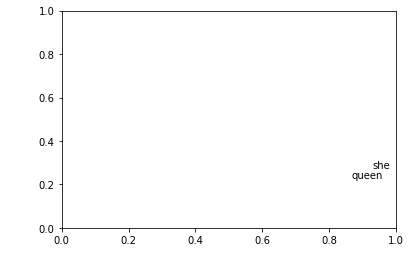

In [835]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()